In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Raízes reais e distintas

Quando as raízes $r_1$ e $r_2$ do polinômio característico são reais e distintas, a solução da EDO é dada por

$u(x)=k_1e^{r_1x}+k_2e^{r_2x}$,

sendo

$k_1=\dfrac{u_L-u_0e^{r_2L}}{e^{r_1L}-e^{r_2L}}$

e

$k_2=\dfrac{u_0e^{r_1L}-u_L}{e^{r_1L}-e^{r_2L}}$.

In [3]:
def two_real_roots_solution(x, u0, L, uL, r1, r2):
  # Solução quando o polinômio característico tem duas raízes reais e distintas
  # Entrada:
  # x  : valor do domínio
  # u0 : primeira condição de fronteira
  # L  : valor da segunda condição de fronteira
  # uL : valor da segunda condição de fronteira
  # r1 : primeira raiz do polinômio caracteístico
  # r2 : segunda raiz do polinômio característico
  # Saída:
  # u  : imagem de x por u
  k1 = (uL - u0*np.exp(r2*L))/(np.exp(r1*L) - np.exp(r2*L))
  k2 = (u0*np.exp(r1*L) - uL)/(np.exp(r1*L) - np.exp(r2*L))
  u = k1*np.exp(r1*x) + k2*np.exp(r2*x)
  return u

## Duas raízes reais idênticas

Quando as raízes do polinômio característico são reais e idênticas ($r_1=r_2=r$), a solução é dada por

$u(x)=k_1e^{rx}+k_2xe^{rx}$,

sendo

$k_1=u_0$

e

$k_2=\dfrac{u_L - u_0e^{rL}}{Le^{rL}}$.

In [4]:
def one_real_root_solution(x, u0, L, uL, r):
  # Solução quando o polinômio característico tem duas raízes reais idênticas
  # Entrada:
  # x  : valor do domínio
  # u0 : primeira condição de fronteira
  # L  : valor da segunda condição de fronteira
  # uL : valor da segunda condição de fronteira
  # r  : raiz do polinômio caracteístico
  # Saída:
  # u  : imagem de x por u
  k1 = u0
  k2 = (uL - u0*np.exp(r*L))/L*np.exp(r*L)
  u = k1*np.exp(r*x) + k2*x*np.exp(r*x)
  return u

## Duas raízes complexas

Quando o polinômio característico tem duas raízes complexas, uma é o conjugado da outra. Assim, se $r_1=\phi+j\omega$, então $r_2=\phi-j\omega$. Aqui se usa $j$ como a constante imaginária que satisfaz $j^2=-1$. Note que

$\phi=-\dfrac{\beta}{2\alpha}$

e que

$\omega = -\dfrac{\sqrt{\Delta}}{2\alpha}$.

A solução da EDO nesse caso é dada por

$u(x)=e^{\phi x}[k_1 cos(\omega x)+k_2 sen(\omega x)]$,

sendo

$k_1 = u_0$

e

$k_2 = \dfrac{u_L/e^{\phi L} - u_0 cos(\omega L)}{sen(\omega L)}$.

In [5]:
def two_complex_roots_solution(x, u0, L, uL, phi, omega):
  # Solução quando o polinômio característico tem duas raízes complexas
  # Entrada:
  # x     : valor do domínio
  # u0    : primeira condição de fronteira
  # L     : valor da segunda condição de fronteira
  # uL    : valor da segunda condição de fronteira
  # phi   : componente real das raízes do polinômio caracteístico
  # omega : pseudofrequência
  # Saída:
  # u     : imagem de x por u
  k1 = u0
  k2 = (uL/np.exp(phi*L) - u0*np.cos(omega*L))/np.sin(omega*L)
  u = np.exp(phi*x)*(k1*np.cos(omega*x) + k2*np.sin(omega*x))
  return u

In [6]:
def ode(alpha, beta, gamma, u0, L, uL, N):
  # Solução da EDO linear de 2a ordem de coeficientes constantes
  # Entrada:
  # alpha : coeficiente da segunda derivada de u
  # beta  : coeficiente da primeira derivada de u
  # gamma : coeficiente de u
  # u0    : valor da primeira condição de fronteira
  # L     : fronteira final
  # uL    : valor da segunda condição de fronteira
  # N     : número de pontos
  # Saída:
  # Gráfico da solução analítica
  u = np.zeros(N+1)                 # vetor com a solução
  u[N] = uL                         # condição de fronteira
  h = L/N                           # passo
  delta = beta*beta - 4*alpha*gamma # discriminante
  if delta > 0:
    r1 = (-beta + np.sqrt(delta))/(2*alpha) # primeira raiz real
    r2 = (-beta - np.sqrt(delta))/(2*alpha) # segunda raiz real
    for i in range(N):
      x = i*h
      u[i] = two_real_roots_solution(x, u0, L, uL, r1, r2)
  elif delta == 0:
    r = -beta/(2*alpha) # raiz real única
    for i in range(N):
      x = i*h
      u[i] = one_real_root_solution(x, u0, L, uL, r)
  else:
    phi = -beta/(2*alpha)             # componente real das raízes complexas
    omega = np.sqrt(-delta)/(2*alpha) # pseudofrequência
    for i in range(N):
      x = i*h
      u[i] = two_complex_roots_solution(x, u0, L, uL, phi, omega)
  plt.title("Solução Analítica do Problema de Valor de Contorno")
  plt.xlabel("x")
  plt.ylabel("u(x)")
  x = np.linspace(0, L, len(u))
  plt.plot(x, u)
  plt.show()

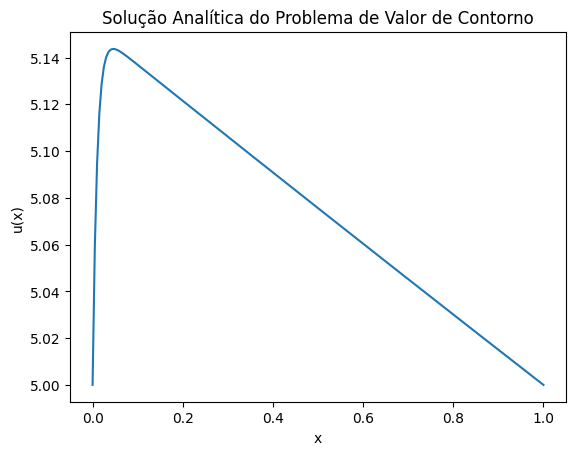

In [11]:
u = ode(alpha=1, beta=100, gamma=3, u0=5, L=1, uL=5, N=200)
